# Understanding Radial Basis Functions and Approximating Functions using RBF

#### In mathematics, a **radial basis function (RBF)** is a real-valued function $\varphi$ whose value depends only on the distance between the input and some fixed point.

#### If the fixed point is the origin, then:
#### $\varphi(\mathbf{x}) = \hat{\varphi}(\| \mathbf{x} \|)$ where $( \| \mathbf{x} \|)$ denotes the norm (or magnitude) of $\mathbf{x}$, representing the distance from the origin.

#### Alternatively, if the fixed point is some other point $\mathbf{c}$, called a **center**, then: $\varphi(\mathbf{x}) = \hat{\varphi}(\| \mathbf{x} - \mathbf{c} \|)$, where $(\| \mathbf{x} - \mathbf{c} \|)$ is the distance from $\mathbf{x}$ to the center $\mathbf{c}$.


#### Commonly used types of radial basis functions include (writing ${\textstyle r=\left\|\mathbf {x} -\mathbf {x} _{i}\right\|}$ and using ${\textstyle \varepsilon }$ to indicate a shape parameter that can be used to scale the input of the radial kernel.
#### In this notebook, we will be studying:
- Gaussian:               ${\displaystyle \varphi (r)=e^{-(\varepsilon r)^{2}}}$
- Multiquadratic:         ${\displaystyle \varphi (r)={\sqrt {1+(\varepsilon r)^{2}}}}$
- Inverse multiquadric:   ${\displaystyle \varphi (r)={\dfrac {1}{\sqrt {1+(\varepsilon r)^{2}}}}}$

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

In [9]:
# Lets assume the function that we are interpolating is ϕ(x) = sin(2πx) · cos(5πx)

def phi(x):
    val=np.sin(2*np.pi*x)*np.cos(5*np.pi*x)
    return val

In [10]:
print(phi(22))

-1.9599300631450357e-14


In [11]:
def gaussian(x1,x2,sigma=1):
    val=np.exp(-(x1-x2)**2/(2*sigma**2))
    return val

In [12]:
def kernel_matrix(X, sigma=1, f=gaussian):
    mat = np.zeros([len(X),len(X)])
    for i in range(len(X)):
        for j in range(len(X)):
            mat[i,j]= f(X[i],X[j],sigma)
    return mat

In [13]:
def rbf_model(A, w):
    val=np.dot(np.linalg.inv(A),w)
    return val

In [33]:
def rbf_predict(x, X, m, l = 1, f = gaussian):
    S = np.zeros(len(x))
    for i in range(len(m)):
        S = S + m[i] * f(x, X[i], l)
    return S

<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2166/2905591738.py:18: SyntaxWarning: invalid escape sequence '\p'
  "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)$",
/tmp/ipykernel_2166/2905591738.py:21: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\phi(x)$", fontsize = 16)


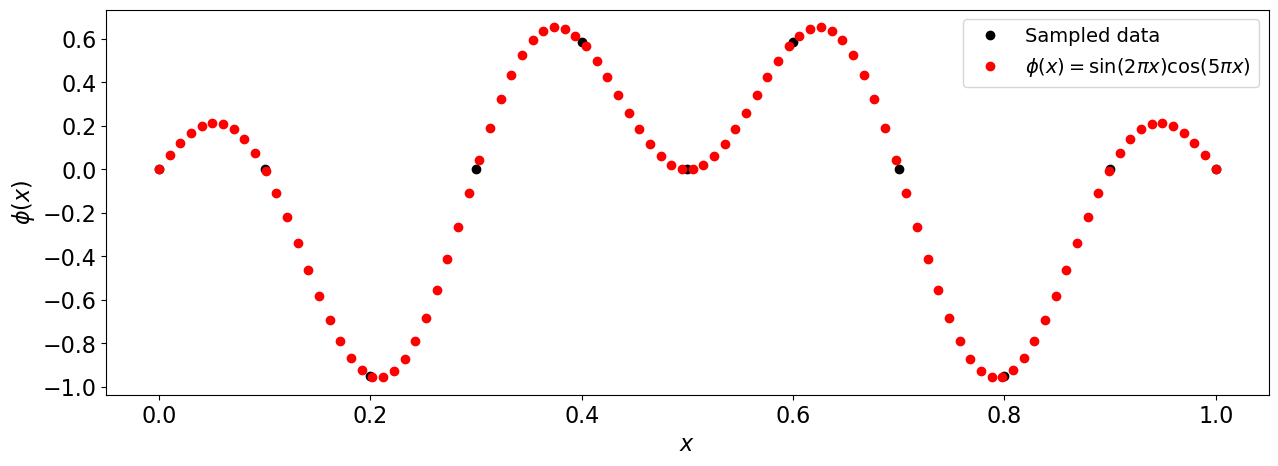

In [59]:
# Sample 10 values of X and phi.
N = 10
X = np.arange(0, N + 1, 1) / N
d = phi(X)# Gaussian length scale.
sigma = 1 / 9# Calculate the kernel matrix G
G = kernel_matrix(X, sigma, gaussian)

# Invert d = Gm for the model parameters.
m = rbf_model(G, d)# Using m, interpolate phi for all values in x ∈ [0, 1].
x = np.linspace(0, 1, 100)

S = rbf_predict(x, X, m, L, gaussian)# Plot the results.
plt.figure(figsize = [15, 5])
plt.plot(X, d, "ko")     # Sampled discrete data points of phi.
# plt.plot(x, phi(x), "r") # True "continuous" values of phi.
plt.plot(x, S, "ro")    # # Interpolated values of phi.
plt.legend(["Sampled data", 
            "$\phi(x) = \sin(2 \pi x) \cos(5 \pi x)$", 
            "RBF Interpolation"], fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\phi(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

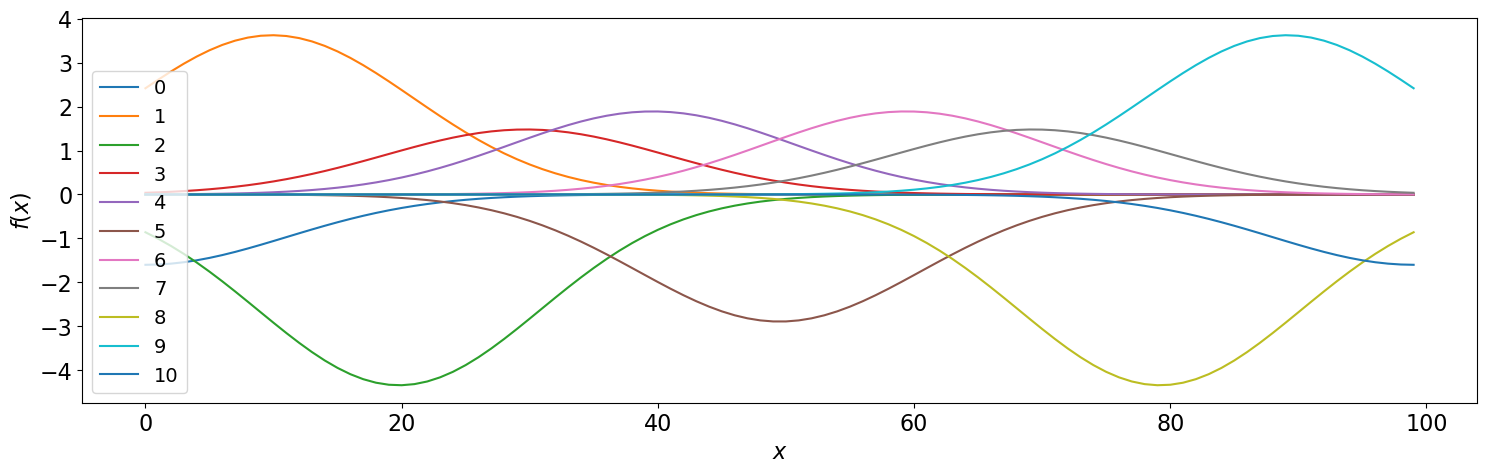

In [23]:
# Plot the 10 weighted Gaussians used in the interpolation model.
plt.figure(figsize = [18, 5])
for i in range(len(m)):
    plt.plot(m[i] * gaussian(x, X[i], L))
plt.legend(range(len(m)), fontsize = 14)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$f(x)$", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [6]:
a=np.array([1,2,3])
a=np.transpose(a)
print(a)

[1 2 3]


In [7]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
x=[1,2,3]
print(np.dot(a,x))

[14 32 50]


In [39]:
z=np.zeros(5)
z=z+2
z=z**2
n_a=np.zeros(5) + 3
print(z * n_a)

[12. 12. 12. 12. 12.]
